# Krystian Gronek & Katarzyna Piotrowska
# Text Mining and Social Media Mining, final project - Analyzing men and women comments using NLP methods

# Loading packages and data

In [1]:
%matplotlib inline 
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
from collections import Counter

In [2]:
# Functions

# Function to convert list of strings represented itself as string to a normal list with strings
def destring_list(input_list):
    input_list = input_list.strip('][')
    output_list = re.compile("\]\[").sub(', ', input_list)
    output_list = re.compile("\'").sub('', output_list).split(', ') 
    return output_list


In [3]:
men = pd.read_csv('data/final_askmen.csv', sep = ';')
women = pd.read_csv('data/final_askwomen.csv', sep = ';')

In [4]:
men.info()
print("\n")
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16171 entries, 0 to 16170
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   username                          16171 non-null  object 
 1   com_original                      16171 non-null  object 
 2   cleaned                           16171 non-null  object 
 3   cleaned_wo_sw                     16171 non-null  object 
 4   tokenized                         16171 non-null  object 
 5   stemmed                           16171 non-null  object 
 6   tokenized_wo_sw                   16171 non-null  object 
 7   submission_title                  16171 non-null  object 
 8   submission_title_cleaned          16171 non-null  object 
 9   submission_title_cleaned_wo_sw    16171 non-null  object 
 10  submission_title_tokenized        16171 non-null  object 
 11  submission_title_stemmed          16171 non-null  object 
 12  subm

# Summary of this script

Let's start the analysis by carrying out some visualisation of the text and numerical data that we aquired from scraping /r/AskMen and /r/AskWomen subreddits. First we will briefly look at distribution of the 'submission_ups' and variables representing the individual score of each comment in the dataset which will allow us to investigate how patterns of upvoting posts and comments differ from men to women. Then based on the distribution of comments score variables we will divide the comments into those with positive and those with negative sentiment. Finally we will present simple word cloud visualisation showing what words were more commonly used by men and women.


# Distribution of 'submission_ups' variable

We see below the distribution of the upvotes of submission posts in form of histograms of 'submission_ups' variable for men and women subreddits. It's important to note that the men dataset consists of 314 rows while women dataset has 188 entries. For both histogram plots the binwidth was set to 100. We can very clearly see the difference for men and women distribution of upvotes for submission. In men we can see the biggest count of posts with values of upvotes from 0-100 while for women this is also the case but not as much relatively to the dataset size. We can also observe small number of occurences of posts with higher number of upvotes in the range from 2000 to 14000. For women the biggest values of upvotes occured for ranges 1700-1800.

We can conclude that men tend to either praise some small number of posts disproportionately high or large number of posts disproportionately low (or skip upvoting them at all) while women tend not to group up and mass upvote small number of submissions. 

In [5]:
len(men.submission_title.unique())
len(women.submission_title.unique())

314

188

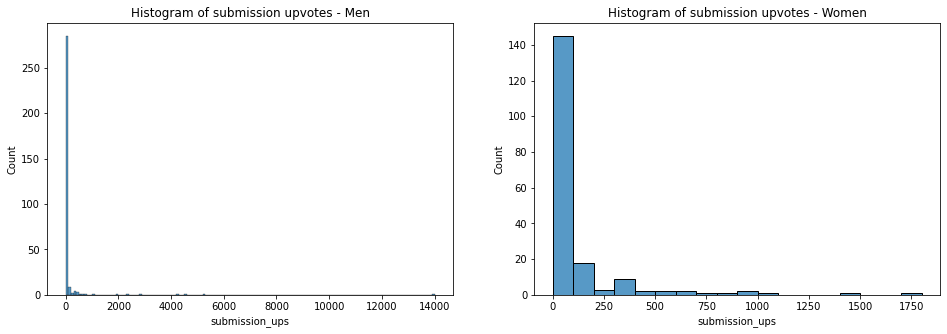

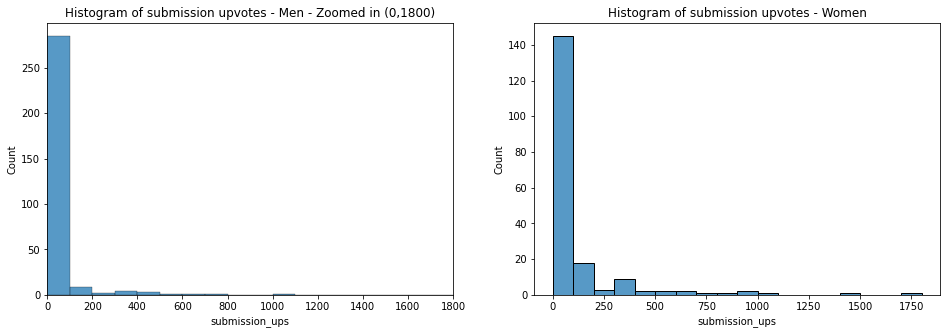

In [6]:
# Get submission upvotes for unique posts
posts_men = men.drop_duplicates(subset = ['submission_title'], keep = 'first').submission_ups
posts_women = women.drop_duplicates(subset = ['submission_title'], keep = 'first').submission_ups

# Plots
fig, ax =plt.subplots(1,2, figsize = (16,5))
hist_submissions_men = sns.histplot(data = posts_men, binwidth = 100, ax = ax[0]).set(title = "Histogram of submission upvotes - Men");
hist_submissions_women = sns.histplot(data = posts_women, binwidth = 100, ax = ax[1]).set(title = "Histogram of submission upvotes - Women");
plt.show();

fig, ax =plt.subplots(1,2, figsize = (16,5))
hist_submissions_men = sns.histplot(data = posts_men, binwidth = 100, ax = ax[0]).set(title = "Histogram of submission upvotes - Men - Zoomed in (0,1800)");
ax[0].set_xlim(0, 1800)
hist_submissions_women = sns.histplot(data = posts_women, binwidth = 100, ax = ax[1]).set(title = "Histogram of submission upvotes - Women");
plt.show();

# MINMAX scaling of variable 'comment_score' - distribution

Let's look back on the 'comment_score', 'minmax' and 'minmax_grouped' distributions first for men dataset then for women datase.The rescaling obviously did not affect the distribution of the values of comment score for men, just the range that it spans as we can see from 'minmax' density plot and histogram. The grouping however allowed to slightly scatter the distribution of the values.

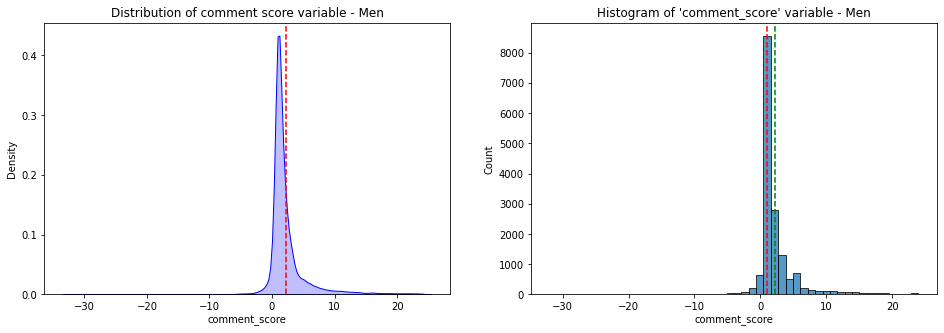

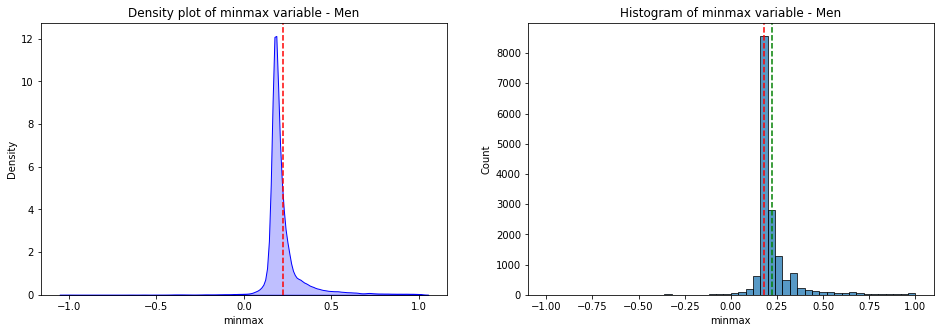

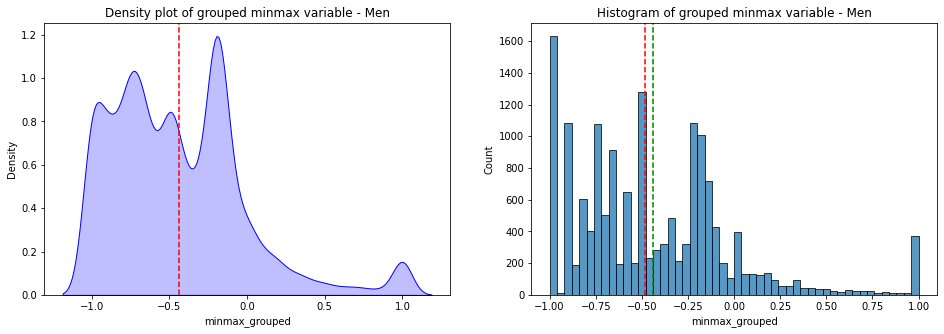

In [7]:
fig, ax =plt.subplots(1,2, figsize = (16,5))
original = sns.kdeplot(data = men.comment_score, fill = True, color = "b", ax = ax[0]);
original.axvline(men.comment_score.mean(), color='r', linestyle='--')
original.set_title("Distribution of comment score variable - Men")
hist_submissions_men = sns.histplot(data = men.comment_score, bins = 50, ax = ax[1]).set(title = "Histogram of 'comment_score' variable - Men");
plt.axvline(men.comment_score.median(), color='r', linestyle='--')
plt.axvline(men.comment_score.mean(), color='g', linestyle='--')
plt.show();

fig, ax =plt.subplots(1,2, figsize = (16,5))
minmax_men_plot = sns.kdeplot(data = men.minmax, fill = True, color = 'b', ax = ax[0]);
minmax_men_plot.set_title("Density plot of minmax variable - Men")
minmax_men_plot.axvline(men.minmax.mean(), color='r', linestyle='--')
hist_submissions_men = sns.histplot(data = men.minmax, bins = 50, ax = ax[1]).set(title = "Histogram of minmax variable - Men");
plt.axvline(men.minmax.median(), color='r', linestyle='--')
plt.axvline(men.minmax.mean(), color='g', linestyle='--')
plt.show();

fig, ax =plt.subplots(1,2, figsize = (16,5))
minmax_men_plot_grouped = sns.kdeplot(data = men.minmax_grouped, fill = True, color = 'b', ax = ax[0]);
minmax_men_plot_grouped.set_title("Density plot of grouped minmax variable - Men")
minmax_men_plot_grouped.axvline(men.minmax_grouped.mean(), color='r', linestyle='--')
hist_submissions_men = sns.histplot(data = men.minmax_grouped, bins = 50, ax = ax[1]).set(title = "Histogram of grouped minmax variable - Men");
plt.axvline(men.minmax_grouped.median(), color='r', linestyle='--')
plt.axvline(men.minmax_grouped.mean(), color='g', linestyle='--')
plt.show();


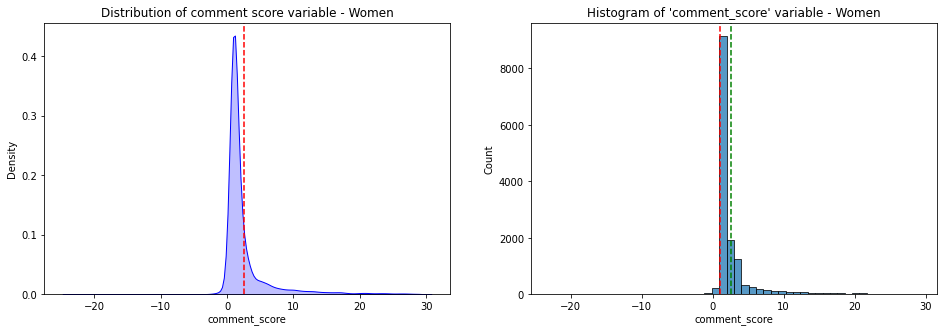

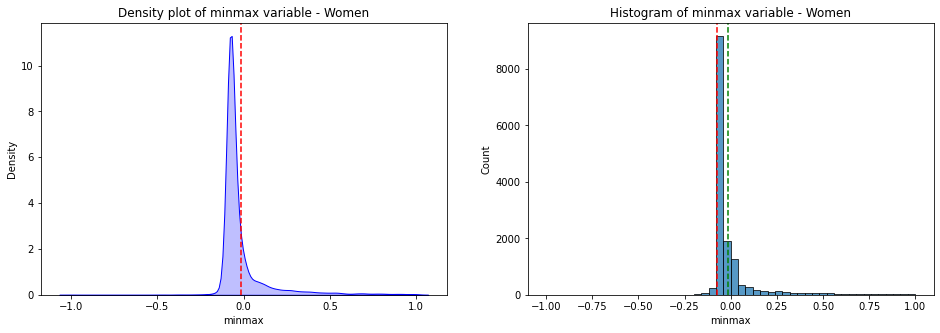

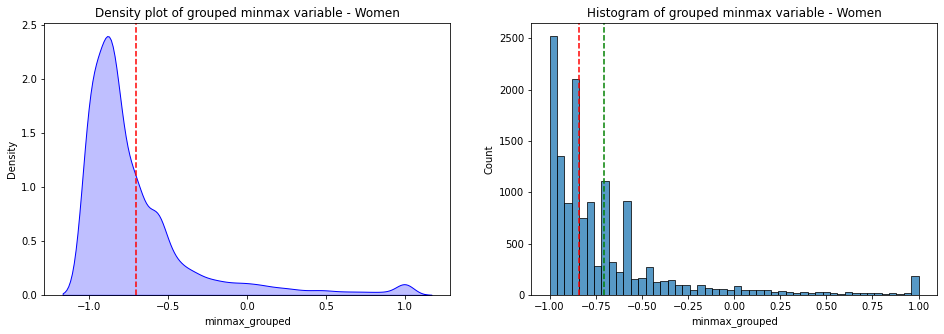

In [8]:
fig, ax =plt.subplots(1,2, figsize = (16,5))
original = sns.kdeplot(data = women.comment_score, fill = True, color = "b", ax = ax[0]);
original.axvline(women.comment_score.mean(), color='r', linestyle='--')
original.set_title("Distribution of comment score variable - Women")
hist_submissions_men = sns.histplot(data = women.comment_score, bins = 50, ax = ax[1]).set(title = "Histogram of 'comment_score' variable - Women");
plt.axvline(women.comment_score.median(), color='r', linestyle='--')
plt.axvline(women.comment_score.mean(), color='g', linestyle='--')
plt.show();

fig, ax =plt.subplots(1,2, figsize = (16,5))
minmax_women_plot = sns.kdeplot(data = women.minmax, fill = True, color = 'b', ax = ax[0]);
minmax_women_plot.set_title("Density plot of minmax variable - Women")
minmax_women_plot.axvline(women.minmax.mean(), color='r', linestyle='--')
hist_submissions_women = sns.histplot(data = women.minmax, bins = 50, ax = ax[1]).set(title = "Histogram of minmax variable - Women");
plt.axvline(women.minmax.median(), color='r', linestyle='--')
plt.axvline(women.minmax.mean(), color='g', linestyle='--')
plt.show();

fig, ax =plt.subplots(1,2, figsize = (16,5))
minmax_women_plot_grouped = sns.kdeplot(data = women.minmax_grouped, fill = True, color = 'b', ax = ax[0]);
minmax_women_plot_grouped.set_title("Density plot of grouped minmax variable - Women")
minmax_women_plot_grouped.axvline(women.minmax_grouped.mean(), color='r', linestyle='--')
hist_submissions_women = sns.histplot(data = women.minmax_grouped, bins = 50, ax = ax[1]).set(title = "Histogram of grouped minmax variable - Women");
plt.axvline(women.minmax_grouped.median(), color='r', linestyle='--')
plt.axvline(women.minmax_grouped.mean(), color='g', linestyle='--')
plt.show();


Looking at the variables distributions for women dataset we could say the same thing. The grouping allowed to slightly scatter the distribution of the values but in this case we can see that it is positively skewed. The question now is what variable to use for the final analysis. 

Because the values are still accumulated very close to each other and looking at the summary statistics below it seems the best way to classify positive and negative comments is to just create new categorical variable 'sentiment' that is a string 'negative' for negative comments that 'comment_score' values are smaller and equal to the median and 'positive' for 'comment_score' values that are bigger than the median. We will not use the mean score because for both dataset (men and women) it achives higher values than the median which would mean that most of the comments would have negative sentiment (which probably is not true). 

As we can see 'comment_score' is not the ideal variable to act as metric for analyzing the sentiment of the comments but it's the only variable avaiable to describe users opinions of other users comments. It may also seem like a black and white view of comments but it is just an approximation of the users sentiment.

In [9]:
men.describe()
women.describe()

,comment_score,submission_ups,minmax,minmax_grouped
count,16171.000000,16171.000000,16171.000000,16129.000000
mean,2.294787,1581.578134,0.224814,-0.440752
std,3.467079,2672.059526,0.123824,0.434350
min,-32.000000,0.000000,-1.000000,-1.000000
25%,1.000000,9.500000,0.178571,-0.760000
50%,1.000000,251.000000,0.178571,-0.483871
75%,2.000000,2893.000000,0.214286,-0.189189
max,24.000000,13949.000000,1.000000,1.000000


,comment_score,submission_ups,minmax,minmax_grouped
count,14638.000000,14638.000000,14638.000000,13792.000000
mean,2.622421,428.003894,-0.014522,-0.704599
std,4.075634,473.234402,0.156755,0.376685
min,-23.000000,0.000000,-1.000000,-1.000000
25%,1.000000,58.000000,-0.076923,-0.923077
50%,1.000000,203.000000,-0.076923,-0.840000
75%,2.000000,780.000000,-0.038462,-0.634680
max,29.000000,1713.000000,1.000000,1.000000


In [10]:
is_positive_men = list()
is_positive_women = list()


for i in men.comment_score:
    if (i > men.comment_score.median()):
        is_positive_men.append('positive')
    else:
        is_positive_men.append('negative')
        

for i in women.comment_score:
    if (i > women.comment_score.median()):
        is_positive_women.append('positive')
    else:
        is_positive_women.append('negative')
        
        
men['sentiment'] = is_positive_men
women['sentiment'] = is_positive_women

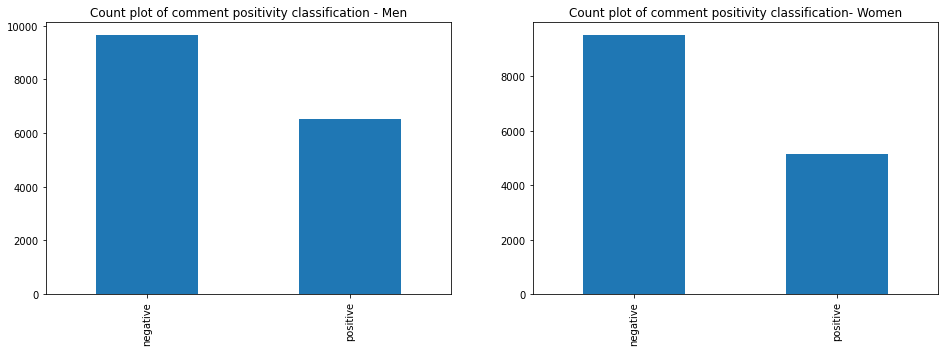

In [11]:
# Checking the counts of each category
fig, ax =plt.subplots(1,2, figsize = (16,5))
men['sentiment'].value_counts().plot(kind='bar', ax = ax[0]).set(title = "Count plot of comment positivity classification - Men");
women['sentiment'].value_counts().plot(kind='bar', ax = ax[1]).set(title = "Count plot of comment positivity classification- Women");
plt.show();

The division of the comments for positive and negative gave out slightly more negative comments but that's because the comment score is an integer number. Because of that dividing the dataset by median gives the most balanced ratio of 'positive' to 'negative' comments. This can be checked by changing the if statements in the foor loops above.

## Saving new variables to dataset

In [12]:
men.to_csv('./data/final_askmen.csv', sep = ';', encoding = "utf-8", index = None, header = True)
women.to_csv('./data/final_askwomen.csv', sep = ';', encoding = "utf-8", index = None, header = True)

# Wordcloud visualisations

/r/AskMen Wordcloud plot


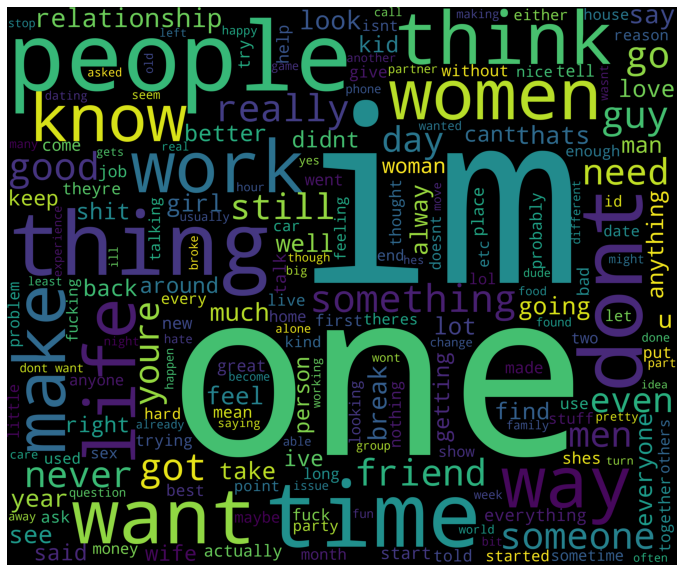

/r/AskWomen Wordcloud plot


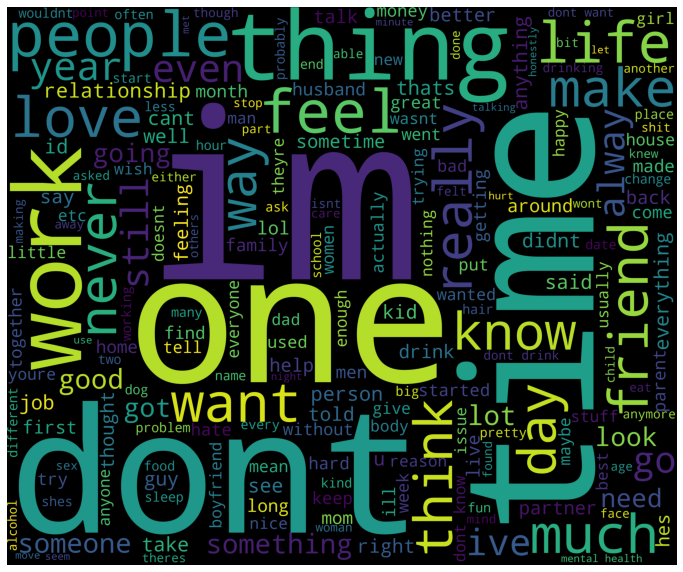

In [13]:
# shared stopword list
stopwords = set(STOPWORDS)

# Men word cloud - comments
cleaned_words_men = ' '.join(men['cleaned_wo_sw'])

wordcloud_men = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_men)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_men)
plt.axis('off')
print("/r/AskMen Wordcloud plot")
plt.show();

# Women word cloud - comments
cleaned_words_women = ' '.join(women['cleaned_wo_sw'])

wordcloud_women = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_women)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_women)
plt.axis('off')
print("/r/AskWomen Wordcloud plot")
plt.show();



As we can see the similarity of the most frequently used words by men and women is truly striking. The biggest diferrences here that we can see is that 'people' seem to be more common in men language than women while words like 'dont', 'feel'.

We should delete the most used words for that seem to occur in both /r/AskMen and /r/AskWomen the biggest number of times for example 'time', 'im', 'dont', 'one', etc. In that way we will be able to see better the different word usage by sex.

/r/AskMen Wordcloud plot


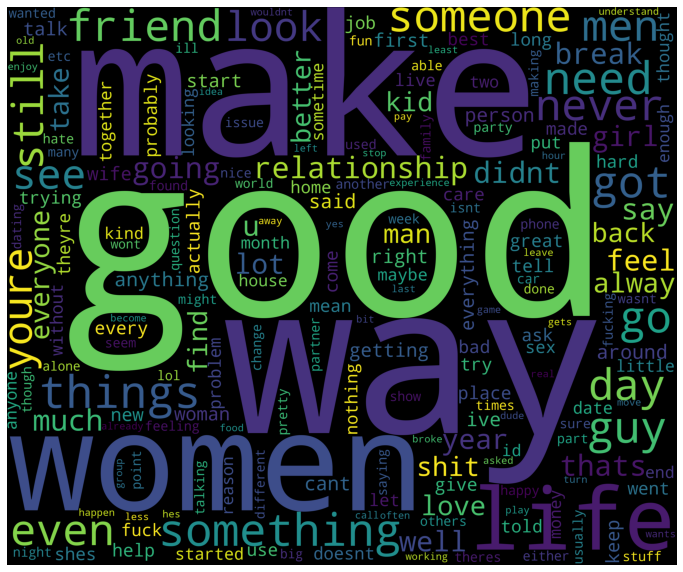

/r/AskWomen Wordcloud plot


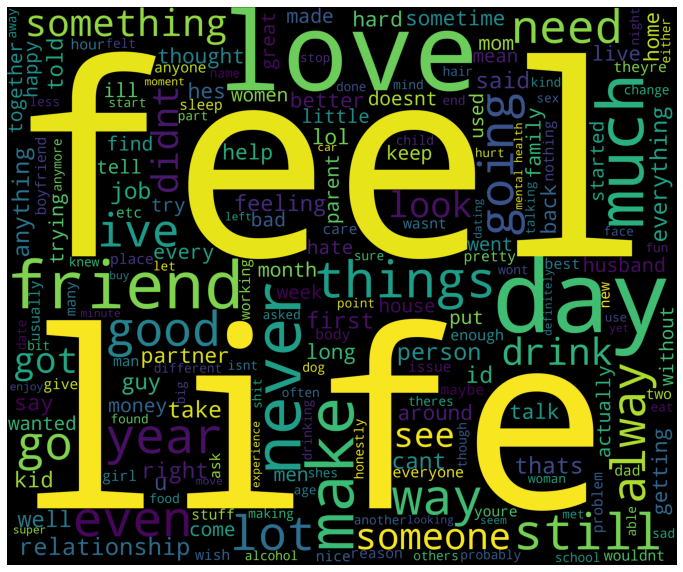

In [14]:
# Men word cloud - comments
cleaned_words_men = ' '.join(men['cleaned_wo_sw'])

# Women word cloud - comments
cleaned_words_women = ' '.join(women['cleaned_wo_sw'])

# Shared stopword list
stopwords = set(STOPWORDS)
stopwords.add("one")
stopwords.add("im")
stopwords.add("time")
stopwords.add("dont")
stopwords.add("people")
stopwords.add("thing")
stopwords.add("work")
stopwords.add("want")
stopwords.add("think")
stopwords.add("know")
stopwords.add("really")

# Men word cloud - comments
wordcloud_men = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_men)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_men)
plt.axis('off')
print("/r/AskMen Wordcloud plot")
plt.show();

# Women word cloud - comments
wordcloud_women = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words_women)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud_women)
plt.axis('off')
print("/r/AskWomen Wordcloud plot")
plt.show();




Above we can see wordclouds for /r/AskMen and /r/AskWomen comments. We can say that for men the most common words are "make", "good", "way" and "women", while for women the most common words are "life", "friend", "feel" and "love". What's very interesting is that women seem to not use word 'men' as much as men do 'women'. Below we can see the barplots with counts of 20 most common words from word clouds approprietly for men and women comments 

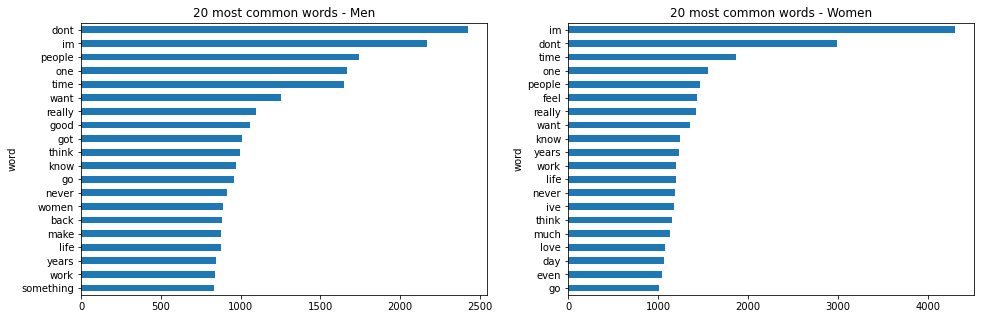

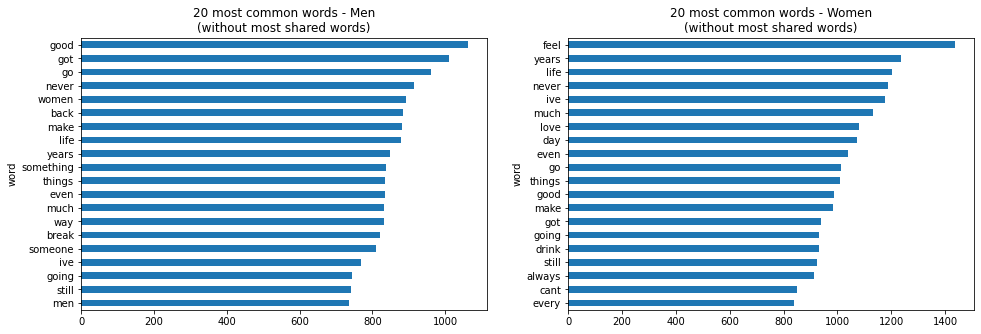

In [15]:
# Frequency of words

# Individual words from all comments in one list
# Men - without stopwords
all_men_tokenized = men.tokenized_wo_sw.sum()
all_men_tokenized = destring_list(all_men_tokenized)
all_men_tokenized_counts = Counter(all_men_tokenized) 

# Women - without stopwords
all_women_tokenized = women.tokenized_wo_sw.sum()
all_women_tokenized = destring_list(all_women_tokenized)
all_women_tokenized_counts = Counter(all_women_tokenized)

# Stopwords
stopwords = set(STOPWORDS)

freq_men = pd.DataFrame.from_records(list(dict(all_men_tokenized_counts).items()), columns = ['word', 'count'])
freq_women = pd.DataFrame.from_records(list(dict(all_women_tokenized_counts).items()), columns = ['word', 'count'])

# Removing any left over stopwords
freq_men = freq_men[~freq_men['word'].isin(stopwords)]
freq_men['order_of'] = list(range(0,len(freq_men)))
freq_women = freq_women[~freq_women['word'].isin(stopwords)]
freq_women['order_of'] = list(range(0,len(freq_women)))

# Preparing datasets further
freq_men = freq_men.sort_values(by = ['count'], ascending = False)
freq_men['order_of'] = list(range(0,len(freq_men)))
freq_men = freq_men.set_index('word', drop = False)
freq_women = freq_women.sort_values(by = ['count'], ascending = False)
freq_women['order_of'] = list(range(0,len(freq_women)))
freq_women = freq_women.set_index('word', drop = False)

# Count plots of words BEFORE removing shared common words
fig, ax =plt.subplots(1,2, figsize = (16,5))
freq_men['count'].loc[freq_men['order_of'] < 20].plot.barh(ax = ax[0],legend = None).set(title = "20 most common words - Men");
ax[0].invert_yaxis()
freq_women['count'].loc[freq_women['order_of'] < 20].plot.barh(ax = ax[1],legend = None).set(title = "20 most common words - Women");
ax[1].invert_yaxis()
plt.show();

# Shared words between men and women comments
stopwords.add("one")
stopwords.add("im")
stopwords.add("time")
stopwords.add("dont")
stopwords.add("people")
stopwords.add("thing")
stopwords.add("work")
stopwords.add("want")
stopwords.add("think")
stopwords.add("know")
stopwords.add("really")

# Removing shared words
freq_men = freq_men[~freq_men['word'].isin(stopwords)]
freq_men['order_of'] = list(range(0,len(freq_men)))
freq_women = freq_women[~freq_women['word'].isin(stopwords)]
freq_women['order_of'] = list(range(0,len(freq_women)))

# Count plots of words AFTER removing shared common words
fig, ax =plt.subplots(1,2, figsize = (16,5))
freq_men['count'].loc[freq_men['order_of'] < 20].plot.barh(ax = ax[0],legend = None).set(title = "20 most common words - Men\n(without most shared words)");
ax[0].invert_yaxis()
freq_women['count'].loc[freq_women['order_of'] < 20].plot.barh(ax = ax[1],legend = None).set(title = "20 most common words - Women\n(without most shared words)");
ax[1].invert_yaxis()
plt.show();
